In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')

In [72]:
# Generate synthetic data
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
X_test.shape

(90, 2)

In [74]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

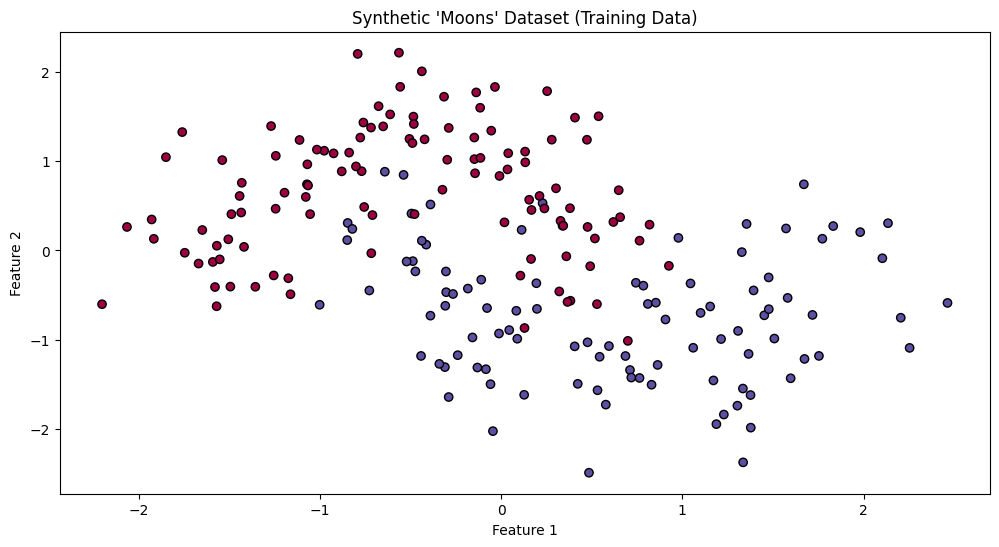

In [75]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral, edgecolor='k')
plt.title("Synthetic 'Moons' Dataset (Training Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## 1. Overfitting (When K is very low)

In [76]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy score when no. neighbours is 1:", accuracy_score(y_test, y_pred))

Accuracy score when no. neighbours is 1: 0.9111111111111111


## 2. Underfitting (When K is vey high)

In [77]:
knn = KNeighborsClassifier(n_neighbors=90)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy score when no. neighbours is 90:", accuracy_score(y_test, y_pred))

Accuracy score when no. neighbours is 90: 0.8666666666666667


## 3. Optimal K

In [78]:
train_acc, test_acc = [], []
for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))

# Optimal k = where test accuracy is max
optimal_k = np.argmax(test_acc) + 1
print(f"Optimal k based on accuracy: {optimal_k}")

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy score when no. neighbours is 6:", accuracy_score(y_test, y_pred))

Optimal k based on accuracy: 6
Accuracy score when no. neighbours is 6: 0.9555555555555556


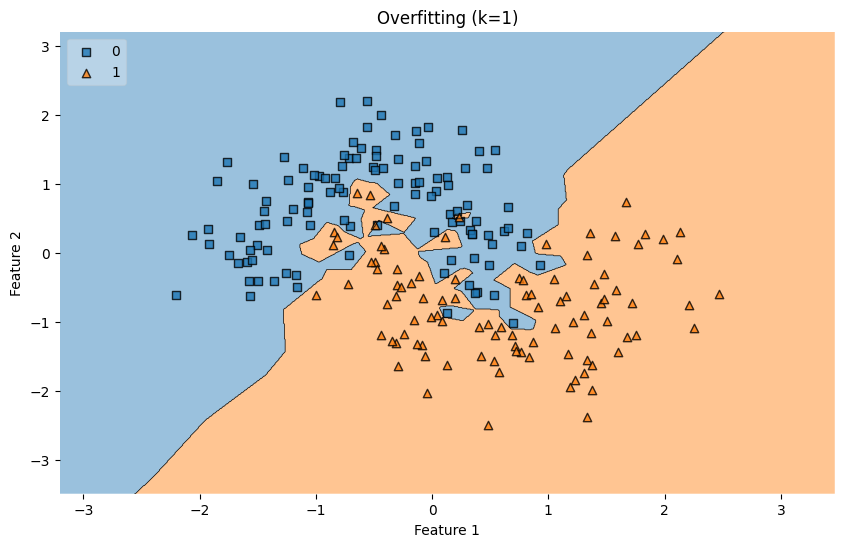

Training Accuracy (k=1): 1.00
Testing Accuracy (k=1): 0.91
----------------------------------------


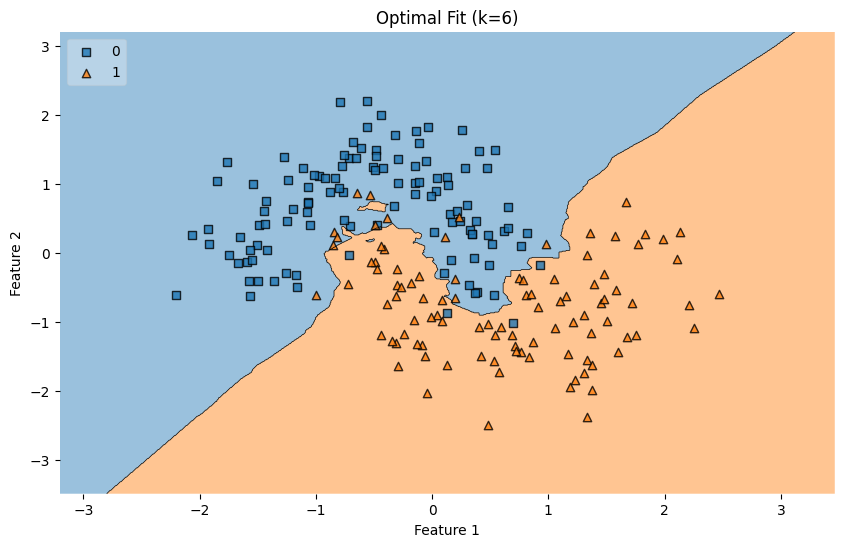

Training Accuracy (k=6): 0.92
Testing Accuracy (k=6): 0.96
----------------------------------------


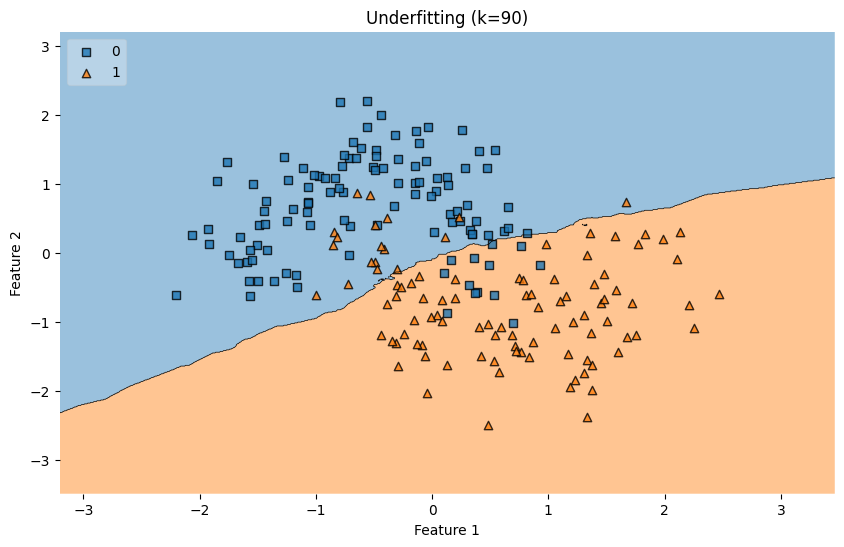

Training Accuracy (k=90): 0.85
Testing Accuracy (k=90): 0.87
----------------------------------------


In [79]:
k_values = [1, optimal_k, 90]
titles = [f"Overfitting (k=1)", f"Optimal Fit (k={optimal_k})", "Underfitting (k=90)"]

# Plot decision boundaries separately
for k, title in zip(k_values, titles):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    plt.figure(figsize=(10,6))
    plot_decision_regions(X=X_train, y=y_train.astype(np.integer), clf=knn, legend=2)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
    
    # Print accuracy
    print(f"Training Accuracy (k={k}): {knn.score(X_train, y_train):.2f}")
    print(f"Testing Accuracy (k={k}): {knn.score(X_test, y_test):.2f}")
    print("-"*40)

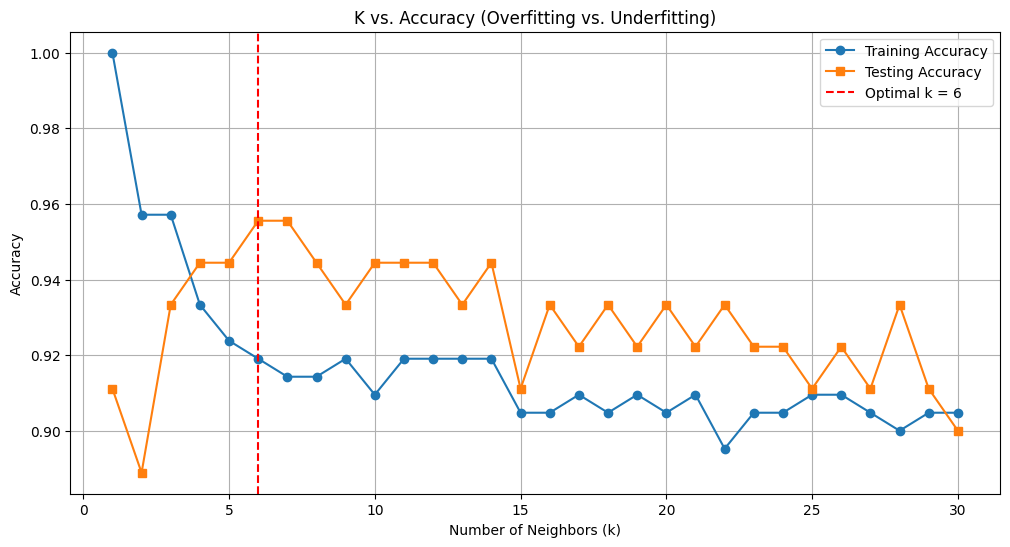

In [80]:
plt.figure(figsize=(12,6))
plt.plot(range(1, 31), train_acc, label="Training Accuracy", marker='o')
plt.plot(range(1, 31), test_acc, label="Testing Accuracy", marker='s')
plt.axvline(optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("K vs. Accuracy (Overfitting vs. Underfitting)")
plt.legend()
plt.grid(True)
plt.show()